In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [3]:
dta= pd.read_csv("sunspots.csv")
dta.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


In [4]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [5]:
dta

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
...,...,...
304,2004,40.4
305,2005,29.8
306,2006,15.2
307,2007,7.5


In [6]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

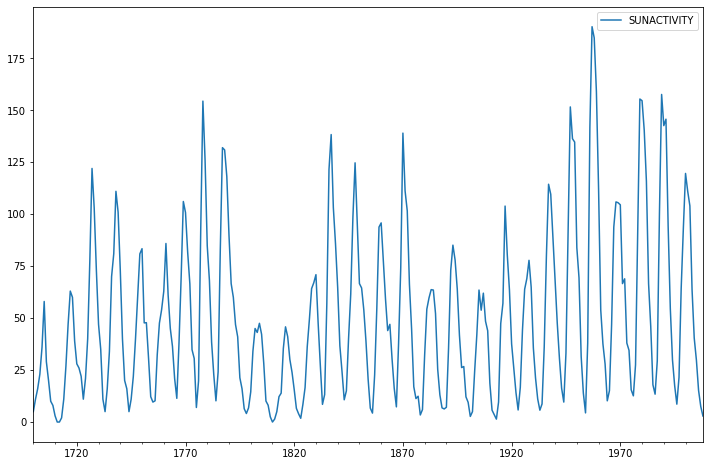

In [7]:
%matplotlib inline
dta.plot(figsize=(12,8));

In [8]:
sm.stats.durbin_watson(dta)

array([0.13952893])

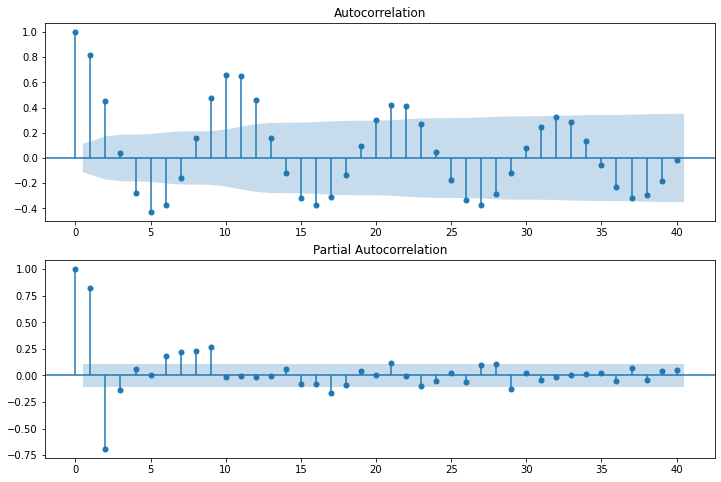

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

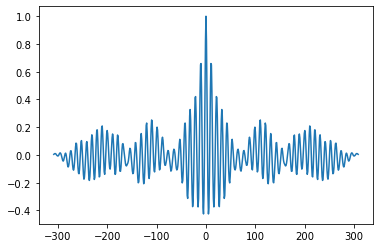

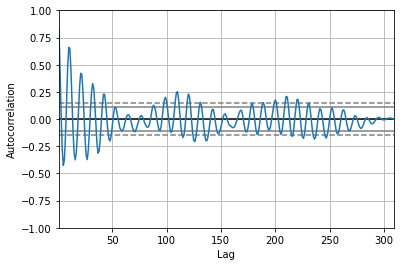

In [10]:
from pandas.plotting import autocorrelation_plot

%matplotlib inline
dta['SUNACTIVITY_2'] = dta['SUNACTIVITY']
dta['SUNACTIVITY_2'] = (dta['SUNACTIVITY_2'] - dta['SUNACTIVITY_2'].mean()) / (dta['SUNACTIVITY_2'].std())
plt.acorr(dta['SUNACTIVITY_2'],maxlags = len(dta['SUNACTIVITY_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['SUNACTIVITY'])
plt.show()

In [11]:
arma_mod20 = sm.tsa.ARMA(dta['SUNACTIVITY'], (1,0)).fit()
print(arma_mod20.params)

const                48.400293
ar.L1.SUNACTIVITY     0.824429
dtype: float64


C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

In [12]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2819.16915243735 2830.3691762680432 2823.6469433212847


In [13]:
sm.stats.durbin_watson(arma_mod20.resid.values)

0.8636763516855228

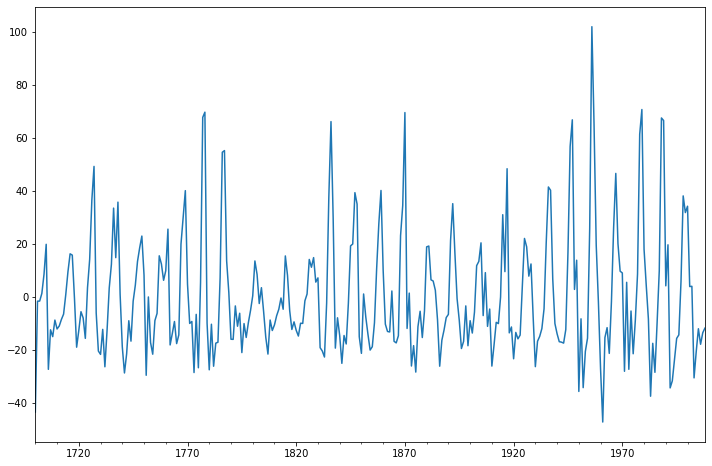

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [15]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=72.07994143125988, pvalue=2.2286383024839084e-16)

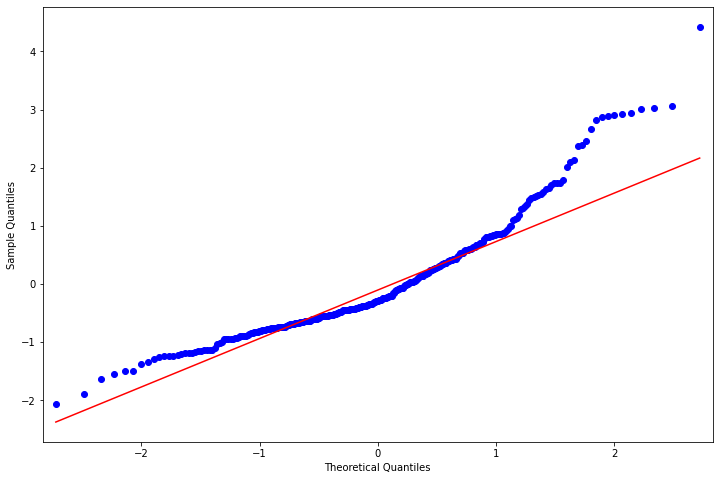

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

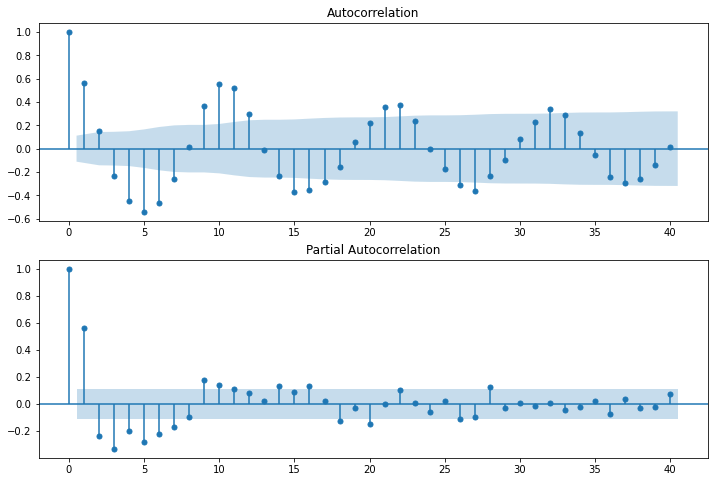

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [18]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC            Q       Prob(>Q)
lag                                       
1.0   0.561922    98.518972   3.219256e-23
2.0   0.154946   106.034144   9.440135e-24
3.0  -0.236914   123.661157   1.255590e-26
4.0  -0.445261   186.127866   3.599736e-39
5.0  -0.539181   278.027589   5.280857e-58
6.0  -0.462535   345.880074   1.182714e-71
7.0  -0.260944   367.547427   2.153468e-75
8.0   0.015898   367.628124   1.558329e-74
9.0   0.365133   410.335243   8.531127e-83
10.0  0.550091   507.591395  1.053238e-102
11.0  0.523266   595.888769  1.061051e-120
12.0  0.299586   624.929295  5.013417e-126
13.0 -0.009197   624.956759  3.650409e-125
14.0 -0.235965   643.094849  3.531994e-128
15.0 -0.369180   687.644747  7.982589e-137
16.0 -0.351380   728.140056  1.320284e-144
17.0 -0.281668   754.250332  2.522139e-149
18.0 -0.157575   762.450056  3.084540e-150
19.0  0.059681   763.630345  1.144637e-149
20.0  0.223295   780.210116  2.241338e-152
21.0  0.359878   823.425441  9.769213e-161
22.0  0.374

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [19]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    138.427671
1991-12-31    122.621452
1992-12-31    109.590350
1993-12-31     98.847135
1994-12-31     89.990120
1995-12-31     82.688142
1996-12-31     76.668182
1997-12-31     71.705153
1998-12-31     67.613490
1999-12-31     64.240205
2000-12-31     61.459172
2001-12-31     59.166408
2002-12-31     57.276188
2003-12-31     55.717836
2004-12-31     54.433086
2005-12-31     53.373901
2006-12-31     52.500678
2007-12-31     51.780769
2008-12-31     51.187254
2009-12-31     50.697944
2010-12-31     50.294543
2011-12-31     49.961967
2012-12-31     49.687782
Freq: A-DEC, dtype: float64


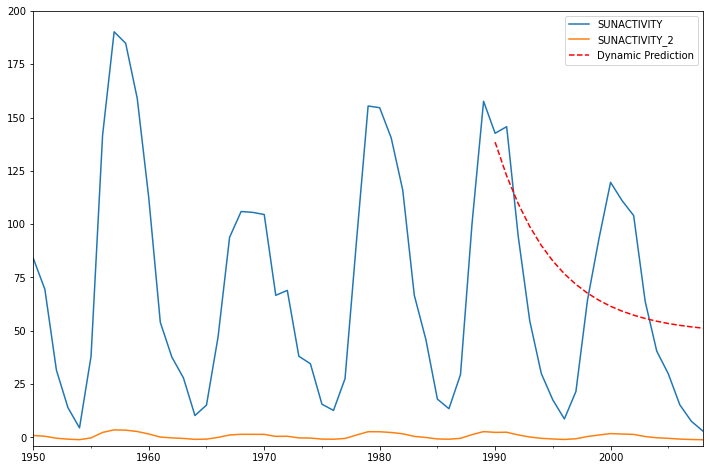

In [20]:
ax = dta.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

In [21]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [22]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

MFE =  -13.309852176739005
MAE =  0.2074616616641949
